In [1]:
import numpy as np
import pandas as pd
import pytz
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
import pickle
from math import sqrt,sin
from sklearn.metrics import mean_squared_error
from sklearn import linear_model 
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
%matplotlib inline
from random import random
from sklearn.neural_network import MLPRegressor

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score




In [3]:
data=pd.read_csv("/Users//sidgupta//Downloads//SolarPrediction.csv")

In [4]:
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [5]:
data = data.sort_values(by='UNIXTime', ascending=True).reset_index(drop=True)
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
1,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
3,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
4,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00
5,1472726704,9/1/2016 12:00:00 AM,00:45:04,2.15,51,30.43,103,67.85,4.50,06:07:00,18:38:00
6,1472727006,9/1/2016 12:00:00 AM,00:50:06,2.07,51,30.43,103,156.58,1.12,06:07:00,18:38:00
7,1472727304,9/1/2016 12:00:00 AM,00:55:04,2.06,52,30.43,103,69.98,7.87,06:07:00,18:38:00
8,1472727607,9/1/2016 12:00:00 AM,01:00:07,2.10,52,30.43,103,92.15,4.50,06:07:00,18:38:00
9,1472727905,9/1/2016 12:00:00 AM,01:05:05,2.07,52,30.42,103,68.17,4.50,06:07:00,18:38:00


In [6]:
HItz= pytz.timezone(zone='US/Hawaii')

In [7]:
datetimeHI = data['UNIXTime'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).replace(tzinfo=pytz.utc).astimezone(HItz))

In [8]:
data['DatetimeHI'] = datetimeHI

In [9]:
start_train = datetime.datetime(2016, 9, 1).replace(tzinfo=HItz)
end_train = datetime.datetime(2016,12, 5).replace(tzinfo=HItz)
start_test = datetime.datetime(2016,12, 9).replace(tzinfo=HItz)
end_test = datetime.datetime(2016,12, 31).replace(tzinfo=HItz)
def is_day(row):
   sun_rise = datetime.datetime.strptime(row['TimeSunRise'], '%H:%M:%S').time()
   sun_set = datetime.datetime.strptime(row['TimeSunSet'], '%H:%M:%S').time()
   if ((sun_set > row['DatetimeHI'].time()) & (sun_rise < row['DatetimeHI'].time())):
       return 1
   else:
       return 0
   
day_bool = np.empty(data.shape[0])

for i in np.arange(data.shape[0]):
   day_bool[i] = is_day(data.iloc[i])

In [10]:
data['Temperature'] = data['Temperature'] * day_bool
data['Pressure'] = data['Pressure'] * day_bool
data['Humidity'] = data['Humidity'] * day_bool
data['WindDirection(Degrees)'] = data['WindDirection(Degrees)'] * day_bool
data['Speed'] = data['Speed'] * day_bool

In [11]:
data['Radiation']     = data['Radiation'].astype(float)
data['Temperature']   = data['Temperature'].astype(float) # or int
data['Pressure']      = data['Pressure'].astype(float)
data['Humidity']      = data['Humidity'].astype(int) # or int
data['WindDirection(Degrees)'] = data['WindDirection(Degrees)'].astype(float)
data['Speed']         = data['Speed'].astype(float)
data['TimeSunRise']   = pd.to_datetime(data['TimeSunRise'],format='%H:%M:%S')
data['TimeSunSet']    = pd.to_datetime(data['TimeSunSet'],format='%H:%M:%S')

In [12]:
data['DayLength'] = (data['TimeSunSet']-data['TimeSunRise'])/np.timedelta64(1, 's')
data.drop(['TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [13]:
data['DayLength']=data['DayLength']* day_bool

/Users/sidgupta/anaconda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


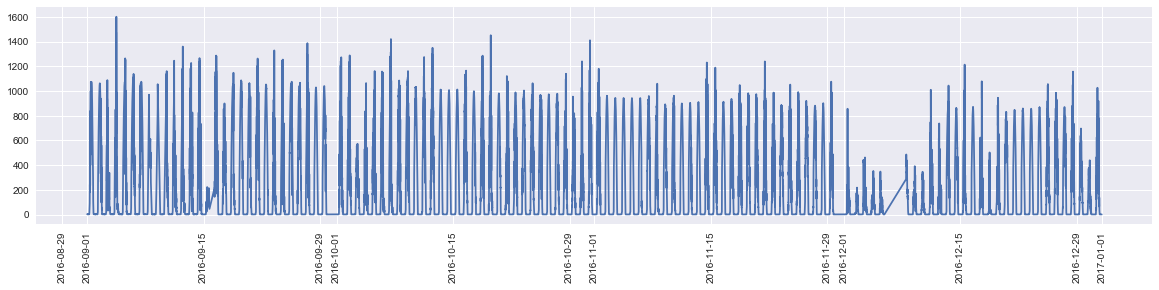

In [14]:
plt.figure(figsize=(20, 4))
plt.plot(data['DatetimeHI'],data['Radiation'])
plt.xticks(rotation=90);

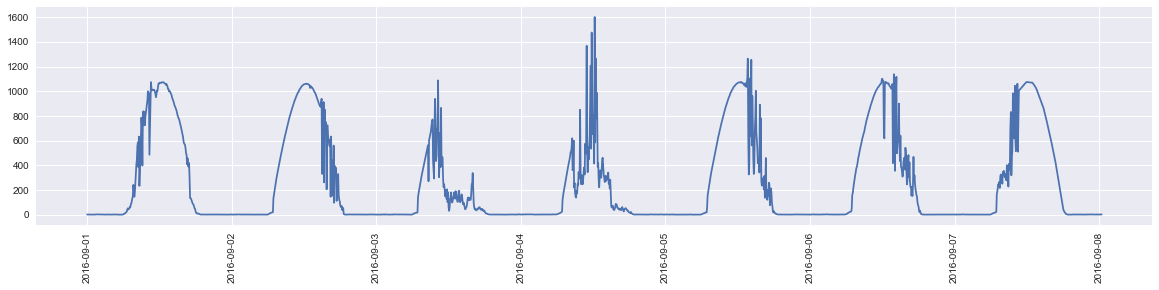

In [15]:
plt.figure(figsize=(20, 4))
weekendmarker = datetime.datetime(2016,9, 8).replace(tzinfo=HItz)
weekonedata = data[data['DatetimeHI'] < weekendmarker]
plt.plot(weekonedata['DatetimeHI'], weekonedata['Radiation'])
plt.xticks(rotation=90);

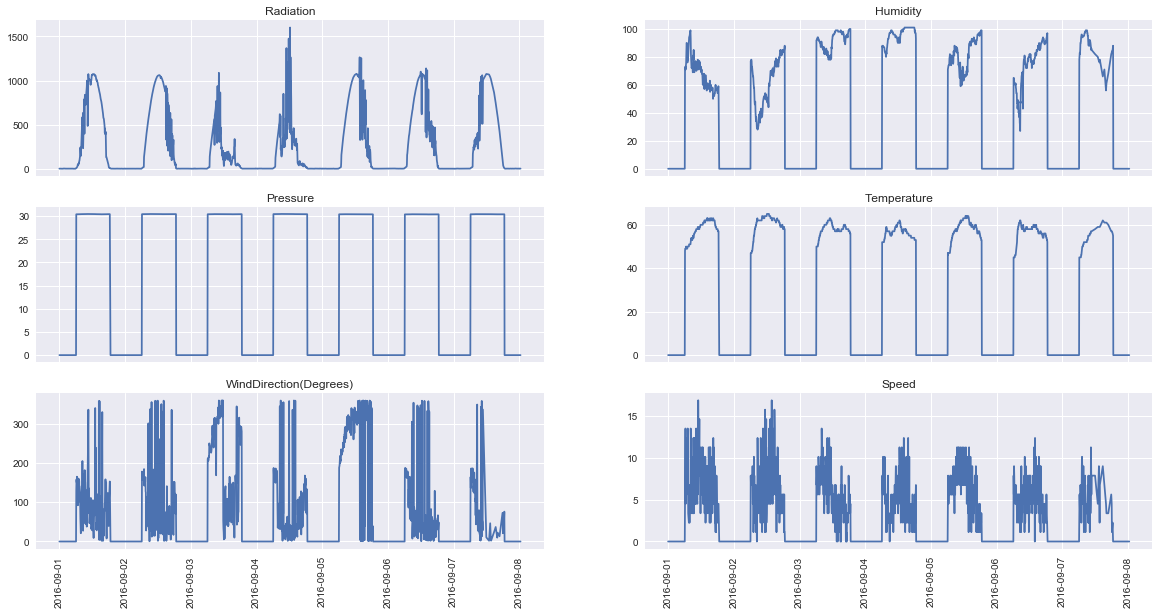

In [16]:
cols=['Radiation','Humidity','Pressure','Temperature','WindDirection(Degrees)','Speed']
fig=plt.figure(figsize=(20,20))
p=[]

for x in cols:
    weekendmarker = datetime.datetime(2016,9, 8).replace(tzinfo=HItz)
    weekonedata = data[data['DatetimeHI'] < weekendmarker]
    p.append(plt.subplot(6,2,int((cols.index(x)+1))))
    #plt.figure(figsize=(20, 4))
    plt.plot(weekonedata['DatetimeHI'], weekonedata[x])
    plt.xticks(rotation=90);
    plt.title(x)
#fig, (p[0],p[1], p[2],p[3],p[4],p[5]) = plt.subplots(nrows=6, sharex=True)
p[0].get_shared_x_axes().join(p[1], p[2],p[3],p[4],p[5])
p[0].set_xticklabels([])
p[1].set_xticklabels([])
p[2].set_xticklabels([])
p[3].set_xticklabels([])
#p[4].set_xticklabels([])

plt.show()



In [17]:
data.set_index('DatetimeHI',inplace=True)
data['WeekOfYear'] = data.index.week
data['WeekOfYear']=data['WeekOfYear']* day_bool

In [18]:
data.drop(['UNIXTime'],axis=1,inplace=True)

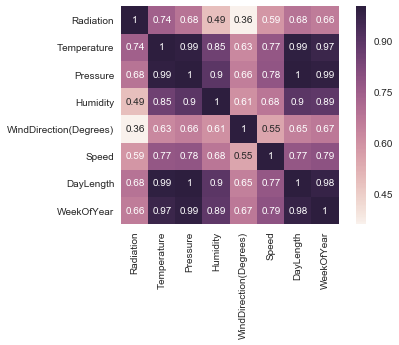

In [19]:
corr = data.corr()
sns.heatmap(corr, square=True,annot=True)

In [20]:
def color_y_axis(ax, color):
    '''Color y axis on two-axis plots'''
    for t in ax.get_yticklabels():
        t.set_color(color)
    ax.yaxis.label.set_color(color)
    return None
def plotVs(df,timescale,feature1,feature2,ax1):
    '''Plot feature vs radiation'''
    ax2=ax1.twinx()
    df_grouped= df.groupby(timescale)

    df_feature1 = df_grouped[feature1].mean()
    df_feature1_errorpos =  df_feature1+df_grouped[feature1].std()/2
    df_feature1_errorneg =  df_feature1-df_grouped[feature1].std()/2
    ax1.plot(df_feature1)
    ax1.fill_between(df_feature1.index, df_feature1_errorpos.values, df_feature1_errorneg.values, alpha=0.3, antialiased=True)
    ax1.set_ylabel(feature1)
    color_y_axis(ax1, 'b')
    if feature2 == 'Radiation':
        rad = df_grouped['Radiation'].mean()
        ax2.plot(rad,'r')
        ax2.fill_between(df_feature1.index, 0, rad, alpha=0.3, antialiased=True, color='red')
        ax2.set_ylabel('Radiation')
        color_y_axis(ax2, 'r')
    else:
        df_feature2 = df_grouped[feature2].mean()
        df_feature2_errorpos =  df_feature2+df_grouped[feature2].std()/2
        df_feature2_errorneg =  df_feature2-df_grouped[feature2].std()/2
        ax1.plot(df_feature2)
        ax1.fill_between(df_feature2.index, df_feature2_errorpos.values, df_feature2_errorneg.values, alpha=0.3, antialiased=True)
        ax1.set_ylabel(feature2)
        color_y_axis(ax1, 'g')
    return ax1, ax2
def HourlyWeeklyVs(df,feature1,feature2):
    '''Plot a feature vs radiation for time of day and week of year'''
    plt.figure(figsize=(18, 6))
    ax=plt.subplot(121) # hourly
    ax1,ax2 = plotVs(df,df.index.hour,feature1,feature2,ax)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2)
    plt.xlabel('Hour of Day (Local Time)')
    plt.title('Mean Hourly {0} vs. Mean Hourly {1}'.format(feature1,feature2))

    ax=plt.subplot(122) # weekly
    ax1, ax2 = plotVs(df,pd.Grouper(freq='W'),feature1,feature2,ax)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2)
    plt.xlabel('Week of Year')
    plt.title('Mean Weekly {0} vs. Mean Weekly {1}'.format(feature1,feature2))
    return

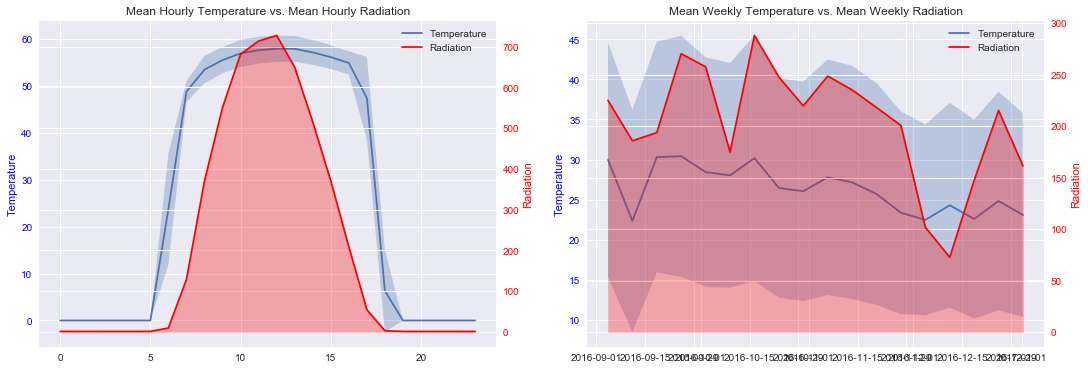

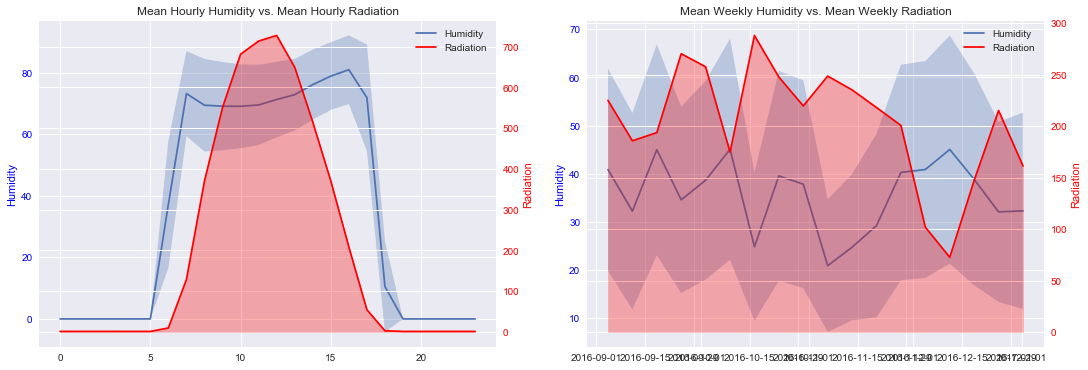

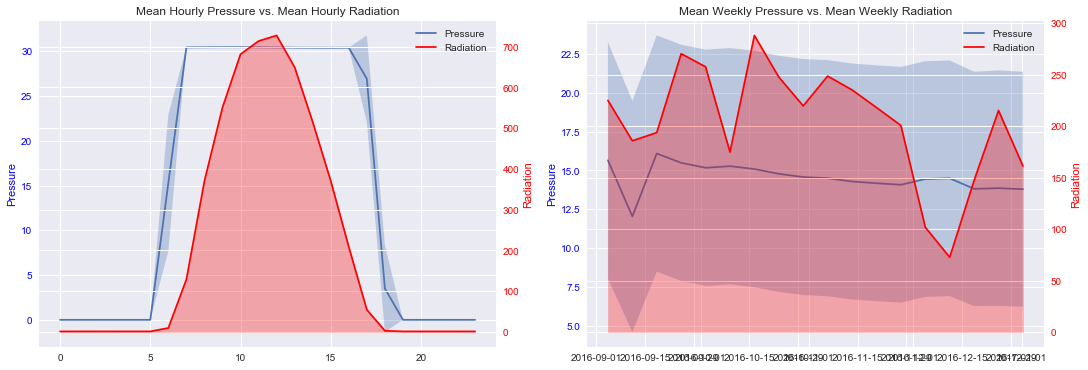

In [21]:
feature_list=['Radiation','Temperature','Humidity','Pressure']
for feature in feature_list[1:]: # radiation vs feature
    HourlyWeeklyVs(data,feature,feature_list[0])
plt.show()

In [22]:
data.drop(['WindDirection(Degrees)','Speed','Data','Time'], axis=1, inplace=True)

In [23]:
data['TimeOfDay'] = data.index.hour

In [24]:
data['TimeOfDay'] =data['TimeOfDay']* day_bool

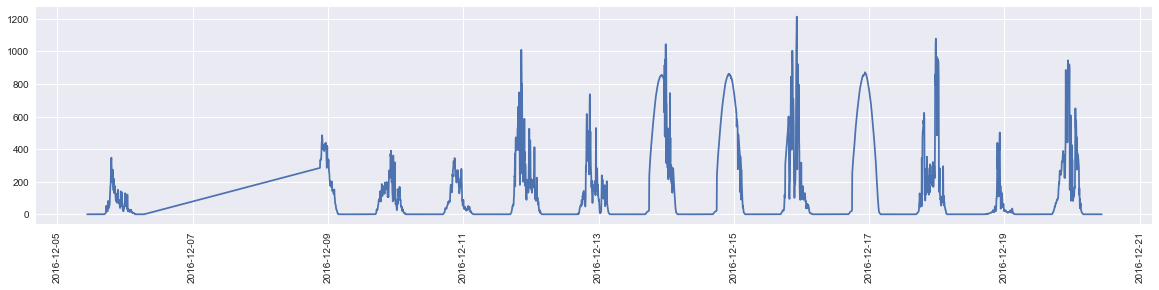

In [25]:
plt.figure(figsize=(20, 4))
marker1 = datetime.datetime(2016,12, 5).replace(tzinfo=HItz)
marker2 = datetime.datetime(2016,12, 20).replace(tzinfo=HItz)
marker3 = datetime.datetime(2016,12, 25).replace(tzinfo=HItz)
errordata1 = data[(data.index > marker1) & (data.index < marker2) ]  
plt.plot( errordata1['Radiation'] )
plt.xticks(rotation=90);

In [26]:
data['DatetimeHI']=data.index

In [27]:
TRAIN = data[(data.index < marker1)]
TEST = data[(data.index > marker2)&(data.index < marker3)]

In [28]:
TRAIN=TRAIN.reset_index(drop=True)

In [29]:
for ix in TRAIN.index:
    if (TRAIN.loc[ix, 'Temperature'] == 0):
        TRAIN.loc[ix,'Radiation']=0

In [30]:
X_train = TRAIN.drop(['Radiation','DatetimeHI'],axis=1)
X_test = TEST.drop(['Radiation','DatetimeHI'],axis=1)
y_train = TRAIN['Radiation']
y_test = TEST['Radiation']

In [31]:
lin_reg = linear_model.LinearRegression() 
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lin_reg.score(X=X_test, y=y_test) 

0.6275841711827281

In [33]:
y_pred = lin_reg.predict(X_test)

In [34]:
errors=abs(y_pred-y_test)
err=np.mean(errors)
#np.set_printoptions(threshold=np.inf)
#y_pred
err

117.44624750563148

Text(0.5, 1.0, 'Observed vs Predicted')

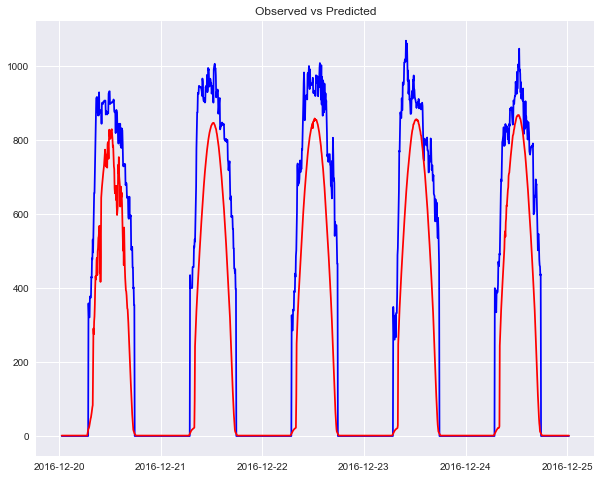

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(TEST['DatetimeHI'] ,y_pred, c='blue', label='Predicted')
plt.plot( TEST['DatetimeHI'],y_test, c='red', label='Observed')
plt.title('Observed vs Predicted')

In [36]:
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

195.58632541697366

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mae

117.44624750563193

In [38]:
from sklearn.tree import DecisionTreeRegressor as DTR

# fit random forest
dt = DTR(criterion='mae')
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
dt.score(X=X_test, y=y_test)

0.9479187471574859

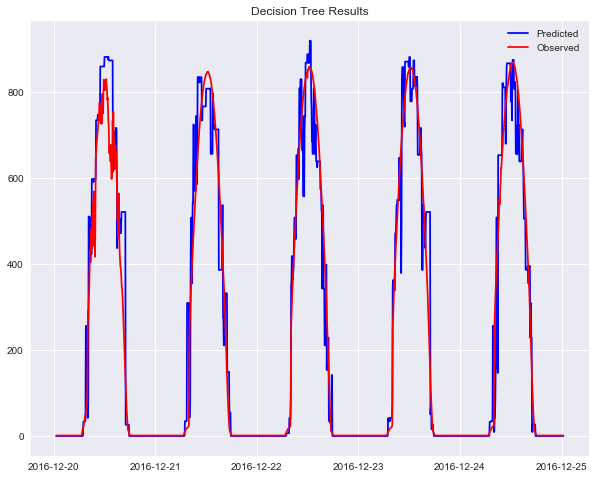

In [40]:
plt.figure(figsize=(10, 8))
y_pred = dt.predict(X_test)
plt.plot(TEST['DatetimeHI'], y_pred, c='blue', label='Predicted')
plt.plot(TEST['DatetimeHI'], y_test, c='red', label='Observed')
plt.title('Decision Tree Results')
plt.legend()

In [41]:
rms = sqrt(mean_squared_error(y_test, y_pred))
rms


73.14171395746958

In [42]:
r2 = r2_score(y_test, y_pred)
r2

0.9479187471574859

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mae

37.307152294853964

In [44]:
errors=abs(y_pred-y_test)
err=np.mean(errors)
#np.set_printoptions(threshold=np.inf)
#y_pred
err

37.30715229485413

In [45]:
from sklearn.ensemble import RandomForestRegressor as RFR
random_forest = RFR(n_estimators=100)


In [46]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
random_forest.score(X=X_test, y=y_test)

0.9698073672888324

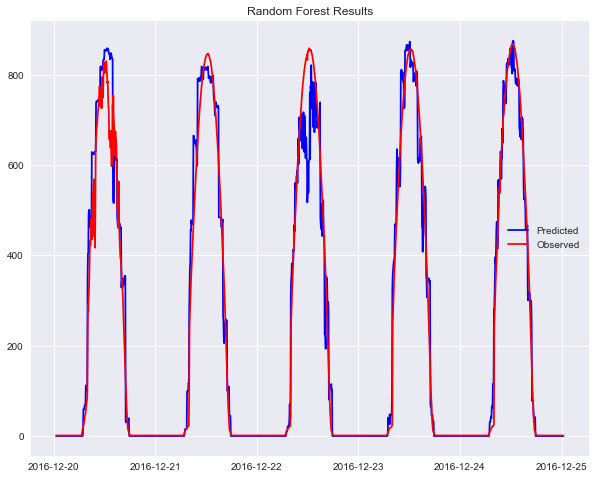

In [48]:
y_pred = random_forest.predict(X_test)
plt.figure(figsize=(10, 8))
plt.plot(TEST['DatetimeHI'], y_pred, c='blue', label='Predicted')
plt.plot(TEST['DatetimeHI'], y_test, c='red', label='Observed')
plt.title('Random Forest Results')
plt.legend()

In [49]:
rms = sqrt(mean_squared_error(y_test, y_pred))
rms


55.689704522940666

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mae

28.046074621836727

In [51]:
errors=abs(y_pred-y_test)
err=np.mean(errors)
#np.set_printoptions(threshold=np.inf)
#y_pred
err

28.046074621836816

In [52]:
TRAIN

,Radiation,Temperature,Pressure,Humidity,DayLength,WeekOfYear,TimeOfDay,DatetimeHI
0,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 00:00:08-10:00
1,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 00:05:10-10:00
2,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 00:20:06-10:00
3,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 00:25:05-10:00
4,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 00:30:09-10:00
5,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 00:45:04-10:00
6,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 00:50:06-10:00
7,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 00:55:04-10:00
8,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 01:00:07-10:00
9,0.0,0.0,0.0,0,0.0,0.0,0.0,2016-09-01 01:05:05-10:00


In [53]:

features = list(range(0,X_train.shape[1]))
features


[0, 1, 2, 3, 4, 5]

In [54]:
train_results = []
test_results = []
for max_feature in range(1,7):
    rf = RFR(max_features=max_feature)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    errors1=abs(train_pred-y_train)
    mae1=np.mean(errors1)
    train_results.append(mae1)
    y_pred = rf.predict(X_test)
    errors2=abs(y_pred-y_test)
    mae2=np.mean(errors2)
    test_results.append(mae2)
#from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot(max_features, train_results, ‘b’, label=”Train AUC”)
#line2, = plt.plot(max_features, test_results, ‘r’, label=”Test AUC”)
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#plt.ylabel(‘AUC score’)
#plt.xlabel(‘max features’)
#plt.show()
test_results


/Users/sidgupta/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sidgupta/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sidgupta/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sidgupta/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sidgupta/anaconda/lib/python3

[71.82270876548152,
 99.3306208245782,
 50.61017354996861,
 41.23743565186951,
 29.025732190321772,
 28.53456428516534]

In [55]:
train_results

[17.78757776068869,
 16.964466601485114,
 17.12879649755696,
 17.09399031007927,
 17.047399850998385,
 17.119335521101874]

In [56]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,400]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RFR(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    errors1=abs(train_pred-y_train)
    mae1=np.mean(errors1)
    train_results.append(mae1)
    y_pred = rf.predict(X_test)
    errors2=abs(y_pred-y_test)
    mae2=np.mean(errors2)
    test_results.append(mae2)
test_results

[45.974114510895006,
 34.147664949214075,
 37.8265904116168,
 34.524719846927084,
 29.103936561959742,
 30.825991998658044,
 28.038366383194923,
 27.683357026608537,
 27.78644992289205,
 27.811074529924994]

In [61]:
from __future__ import division
import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def func1(x):
    for i in range(len(x)):
        train_results = []
        test_results = []
        rf = RFR(n_estimators=int(x[i]),max_depth=int(x[i+1]), n_jobs=-1,max_features=int(x[i+2]))
        rf.fit(X_train, y_train)
        train_pred = rf.predict(X_train)
        errors1=abs(train_pred-y_train)
        mae1=np.mean(errors1)
        y_pred = rf.predict(X_test)
        errors2=abs(y_pred-y_test)
        mae2=np.mean(errors2)
        return mae2

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.randint(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i<self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i
                    
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=1       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant
        
        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()
            
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            # adjust maximum position if necessary
            if self.position_i[i]>=bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<=bounds[i][0]:
                self.position_i[i]=bounds[i][0]
        
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i<maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i<err_best_g or err_best_g==-1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            
            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[5,1,1]              # initial starting location [x1,x2...]
bounds=[(5,10),(1,20),(1,6)] # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1,initial,bounds,num_particles=400,maxiter=100)

FINAL:
[10, 9.618739313697152, 6]
43.57572135463838


In [57]:
rf = RFR(n_estimators=10,max_depth=10,max_features=6)
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
errors1=abs(train_pred-y_train)
mae1=np.mean(errors1)
mae1


35.95972027906159

In [58]:
mae = sqrt(mean_absolute_error(y_test, y_pred))
mae

5.27362062817614

In [59]:
y_pred = rf.predict(X_test)
errors2=abs(y_pred-y_test)
mae2=np.mean(errors2)
mae2

24.452543312906478

In [60]:
rf.score(X=X_test, y=y_test)

0.9778081845268739

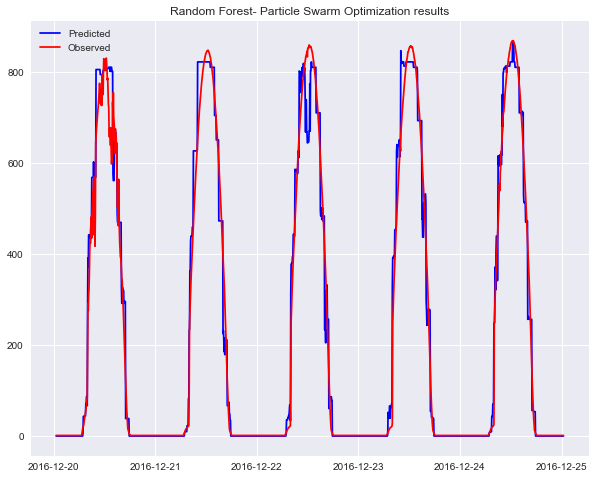

In [61]:
y_pred = rf.predict(X_test)
plt.figure(figsize=(10, 8))
plt.plot(TEST['DatetimeHI'], y_pred, c='blue', label='Predicted')
plt.plot(TEST['DatetimeHI'], y_test, c='red', label='Observed')
plt.title('Random Forest- Particle Swarm Optimization results')
plt.legend()

In [62]:
rms = sqrt(mean_squared_error(y_test, y_pred))
rms


47.74422388119791

In [66]:

from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(240, 400), random_state=1)
clf.fit(X_train, y_train) 

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(240, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [67]:
clf.score(X=X_test, y=y_test)


0.8547878960371605

In [68]:
y_pred = clf.predict(X_test)
m=max(y_test)
m


868.31

In [69]:
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

122.13097681172773

In [70]:
mae =mean_absolute_error(y_test, y_pred)
mae

66.08782413652176

In [71]:
mae/m

0.07611086378887928

In [72]:
errors2=abs(y_pred-y_test)
mae2=np.mean(errors2)
mae2

66.08782413652173

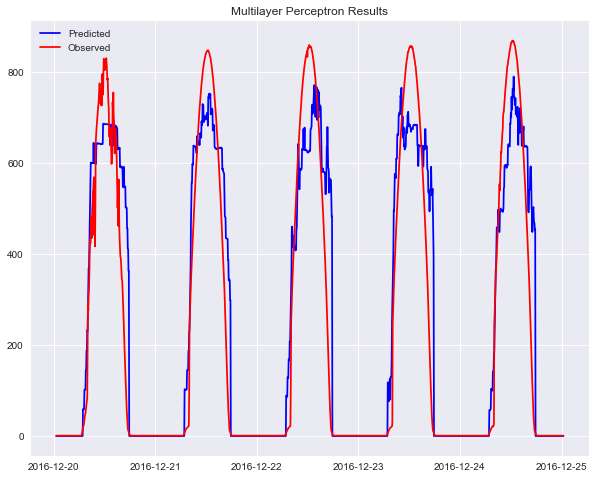

In [73]:
plt.figure(figsize=(10, 8))
plt.plot(TEST['DatetimeHI'] ,y_pred, c='blue', label='Predicted')
plt.plot( TEST['DatetimeHI'],y_test, c='red', label='Observed')
plt.title('Multilayer Perceptron Results')
plt.legend()

In [32]:
from __future__ import division
import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def func1(x):
    for i in range(len(x)):
        clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(int(x[i]),int(x[i+1])), random_state=1)
        clf.fit(X_train, y_train) 
        y_pred = clf.predict(X_test)
        errors2=abs(y_pred-y_test)
        mae2=np.mean(errors2)
        return mae2

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.randint(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i<self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i
                    
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=1       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant
        
        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()
            
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            # adjust maximum position if necessary
            if self.position_i[i]>=bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<=bounds[i][0]:
                self.position_i[i]=bounds[i][0]
        
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i<maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i<err_best_g or err_best_g==-1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
            
            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[10,20]              # initial starting location [x1,x2...]
bounds=[(10,30),(20,40)] # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1,initial,bounds,num_particles=200,maxiter=20)

FINAL:
[12.0, 20]
87.98274921538804
